## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [1]:
from pylab import *
%matplotlib inline

In [11]:
data=np.loadtxt('orbit.dat')
print(data.shape)

(200L, 2L)


B**2-4*A*C=-2.85292781948


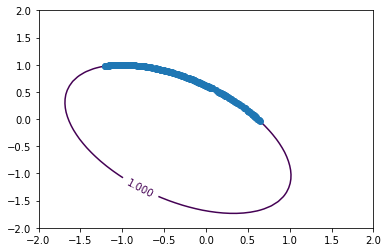

In [59]:
x=data[:,0]
y=data[:,1]
N=len(x) #definiere N als Länge des Arrays
b=np.ones(N) #definiere die rechte Seite des Gleichungssystems, ein Spaltenvektor mit Einsen als Einträgen
A=np.zeros((N,5)) #definiere die Matrix A des überbestimmten LGS
A[:,0]=x**2
A[:,1]=x*y
A[:,2]=y**2
A[:,3]=x
A[:,4]=y
At=np.transpose(A) #bilde die Transponierte
AtA=np.dot(At,A)  #bilde die Matrixprodukte mit der Transponierten
Atb=np.dot(At,b)
c=np.linalg.solve(AtA,Atb) #Löse das LGS
#print(c)
print('B**2-4*A*C='+str(c[1]**2-4*c[0]*c[2])) #Ausgabe von B**2-4*A*C. 
                                              #Dieser Kegelschnitt ist eine geschlossene Kurve, da B**2-4*A*C<0
plot(x,y,'o') #Plotte die Datenpunkte
X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2)) #erstelle ein Meshgrid
f=c[0]*X**2+c[1]*X*Y+c[2]*Y**2+c[3]*X+c[4]*Y #Kegelschnittgleichung mit den gefundenen Parametern
cp=plt.contour(X,Y,f,levels=[1.0]) #erstelle Contour Plot mit der Höhenlinie f=1
clabel(cp)
show() #Zeige Datenpunkte und Lösung der Kegelschnittgleichung in einem Diagramm

In [43]:
plt.contour?

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.